In [2]:
# pip install tensorflow

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten, GRU, LSTM
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
import yfinance as yf

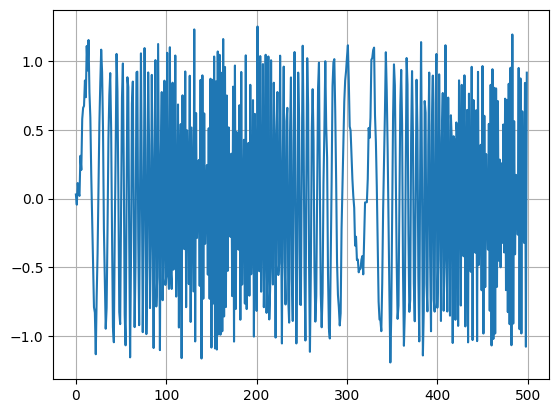

In [15]:
# Generating the dataset

n = 500
series = np.sin((.1*np.arange(n))**2) + np.random.normal(0, .1, n)

plt.plot(series)
plt.grid()
plt.show()

In [16]:
### Thiese two are equivalent

# seq_length = 10

# dataset = tf.keras.utils.timeseries_dataset_from_array(
#     data=series[:-seq_length],              # from 0 to n - seq_length
#     targets=series[seq_length:],            # from seq_length to end
#     sequence_length=seq_length,
#     batch_size=2
# )

# dataset

# model = Sequential([
#     SimpleRNN(10, input_shape=(seq_length, 1)),  # same as SimpleRNN(10)(i)
#     Dense(1)                                     # same as Dense(1)(x)
# ])

# model.compile(loss='mse', optimizer=Adam(learning_rate=0.01))
# fitted_model = model.fit(dataset, epochs=100)

In [21]:
T = 10
X = []
Y = []
D = 1

for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (490, 10, 1) Y.shape (490,)


In [22]:
i = Input(shape=(seq_length, 1))
x = SimpleRNN(10)(i)
x = Dense(1)(x)

model = Model(i,x)

model.compile(loss="mse", optimizer=Adam(learning_rate=0.05))

r = model.fit(X[:-N//2], Y[:-N//2], epochs=200, validation_data=(X[-N//2:], Y[-N//2:]), batch_size=32)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.7836 - val_loss: 0.6103
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4972 - val_loss: 0.5845
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5147 - val_loss: 0.5974
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5304 - val_loss: 0.5278
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4947 - val_loss: 0.5375
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5033 - val_loss: 0.5461
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4620 - val_loss: 0.5583
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4387 - val_loss: 0.5212
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4597 - val_loss: 0.5585
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4831 - val_loss: 0.5029
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4940 - val_loss: 0.5588
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4498 - val_lo

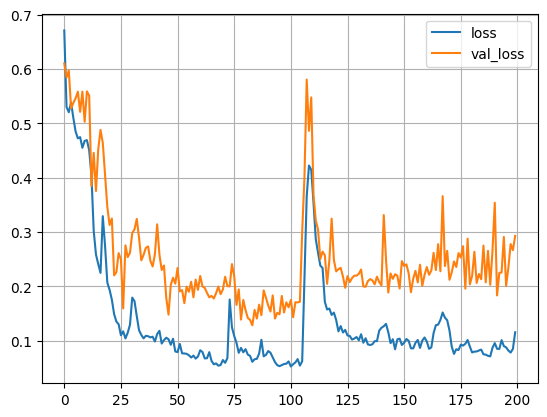

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


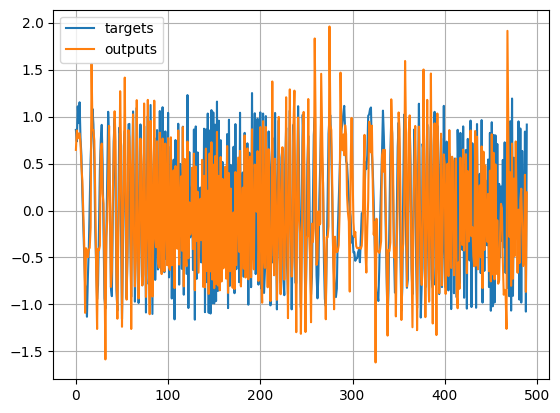

In [23]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.show()

# One step forecast

outputs = model.predict(X)
plt.plot(Y, label='targets')
plt.plot(outputs, label='outputs')
plt.legend()
plt.grid()
plt.show()

In [24]:
# Now we try with the RNN/LSTM model
X = X.reshape(-1, T, 1)

i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)

model2 = Model(i,x)

model2.compile(loss="mse", optimizer=Adam(learning_rate=0.05))

r2 = model2.fit(X[:-N//2], Y[:-N//2], epochs=200, validation_data=(X[-N//2:], Y[-N//2:]), batch_size=32)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.5724 - val_loss: 0.5408
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4926 - val_loss: 0.5821
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4292 - val_loss: 0.5026
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3643 - val_loss: 0.3959
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2952 - val_loss: 0.2491
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1640 - val_loss: 0.2042
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1731 - val_loss: 0.1506
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0904 - val_loss: 0.1213
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0684 - val_loss: 0.1070
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0508 - val_loss: 0.1072
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0519 - val_loss: 0.1119
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0380 - val_lo

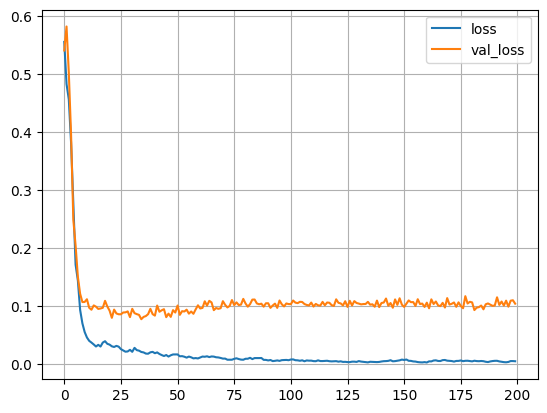

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


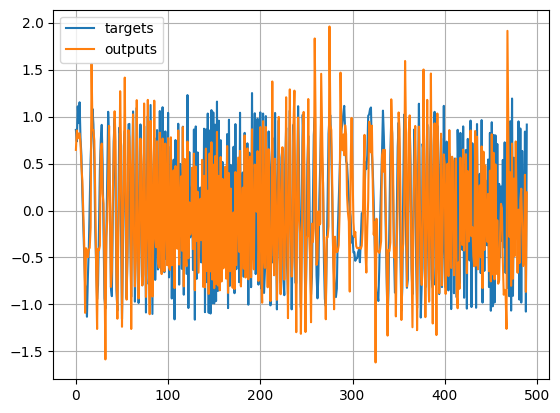

In [25]:
plt.plot(r2.history['loss'], label='loss')
plt.plot(r2.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.show()

# One step forecast

outputs = model.predict(X)
plt.plot(Y, label='targets')
plt.plot(outputs, label='outputs')
plt.legend()
plt.grid()
plt.show()